# Communicating Data Findings
# Part I - Prosper Loan Data Exploration and Visualization
## By Ayomide (Enoch) Fadeyi

## Introduction
> Introducing my dataset
*** Loan Data from Prosper: This data set contains 113,937 observations (loans) with 81 features (variables/columns) on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
Here is the link to the data dictionary to understand the dataset's variables: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


##  General Research Question guiding my analysis
### What are the main driving factors of outcome of loan?

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Loading in my dataset and doing preliminary data exploration

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/prosperLoanData.csv")

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [8]:
df.duplicated

<bound method DataFrame.duplicated of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
corr = df.corr()

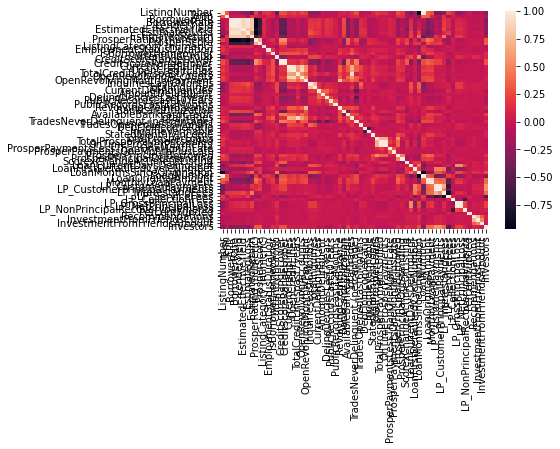

In [12]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [13]:
df.shape

(113937, 81)

In [14]:
df.sample()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
53238,6F89358553250456073240F,867245,2013-08-12 10:09:54.763000000,NaN,60,Current,NaN,0.13942,0.1169,0.1069,...,-92.81,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


> In this section, I am describing properties of my dataset through the questions below. 
Also, motivating my exploration goals through this section.


### What is the structure of your dataset?

> There are 113937 rows/observations, 81 columns/features.


### What is/are the main feature(s) of interest in your dataset?

> First, as a result of the large numbers of features in this dataset, 81 in total, I 
will not be able to use all these in my analysis due to the limitation of time. 
Hence, I will be focusing on parts of these features for the purpose of this analysis.

Here, I am trying to figure out what features can be used to predict default on credit. 
Also, I would like to check what are major factors connected with prosper credit rating.
Hence, the features I am interested in working with are as:
Default on Credit and Repayment

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that borrower's rate will have an impact on the chances of default on credit 
and repayment. Also, the total amount of loan released by prosper and total loans given 
by Prosper will play key roles in this analysis. Finally, the rating, income, and employment 
status will be very significant in this analysis.

Hence, the features below will help support my investigation into my feature of interest:
Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), 
EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, 
LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [15]:
target_features =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [16]:
target_features

['Term',
 'LoanStatus',
 'BorrowerRate',
 'ProsperRating (Alpha)',
 'ListingCategory (numeric)',
 'EmploymentStatus',
 'DelinquenciesLast7Years',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'LoanOriginalAmount',
 'LoanOriginationDate',
 'Recommendations',
 'Investors']

In [17]:
target_df = df[target_features]

In [18]:
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [19]:
target_df.sample(6)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
102179,36,Current,0.1435,B,1,Employed,0.0,5000.000000,NaN,5500,2013-12-09 00:00:00,0,1
25842,36,Current,0.2287,D,1,Employed,3.0,441.666667,1.0,2000,2012-06-13 00:00:00,0,29
48892,36,Completed,0.1450,NaN,0,Not available,0.0,3916.666667,NaN,15000,2006-10-31 00:00:00,0,230
98442,36,Current,0.0769,AA,1,Self-employed,0.0,7250.000000,NaN,9977,2014-01-02 00:00:00,0,1
66407,36,Completed,0.3134,HR,7,Not employed,0.0,0.000000,NaN,2000,2013-04-29 00:00:00,0,51
5185,60,Current,0.2432,D,1,Employed,18.0,5000.000000,NaN,7000,2013-07-10 00:00:00,0,47


In [20]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [21]:
target_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.074818,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.134000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.184000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.250000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.497500,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


In [22]:
corr_target = target_df.corr()

In [23]:
corr_target

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
Term,1.000000,0.020085,0.004947,-0.041492,0.028479,0.070311,0.338927,-0.056680,-0.045137
BorrowerRate,0.020085,1.000000,0.102913,0.170279,-0.088982,-0.049270,-0.328960,-0.030579,-0.274217
ListingCategory (numeric),0.004947,0.102913,1.000000,0.016950,0.001599,0.009398,-0.127130,-0.028031,-0.073996
DelinquenciesLast7Years,-0.041492,0.170279,0.016950,1.000000,-0.025805,-0.034269,-0.136667,0.006495,-0.105479
StatedMonthlyIncome,0.028479,-0.088982,0.001599,-0.025805,1.000000,0.027344,0.201259,-0.018996,0.076244
TotalProsperLoans,0.070311,-0.049270,0.009398,-0.034269,0.027344,1.000000,0.066521,0.054959,-0.035074
LoanOriginalAmount,0.338927,-0.328960,-0.127130,-0.136667,0.201259,0.066521,1.000000,-0.018190,0.380093
Recommendations,-0.056680,-0.030579,-0.028031,0.006495,-0.018996,0.054959,-0.018190,1.000000,0.073824
Investors,-0.045137,-0.274217,-0.073996,-0.105479,0.076244,-0.035074,0.380093,0.073824,1.000000


In [24]:
target_df.isna().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
EmploymentStatus              2255
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

In [25]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index() # Drop missing values in Prosper Rating

In [26]:
# Convert LoanOriginationDate to datetime datatype
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [27]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0) #fill in missing values Total Prosper Loan

In [51]:
target_df.head()

,index,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
12,15,36,Defaulted,0.3177,HR,Other,Other,0.0,5500.000000,0.0,4000,2012-04-19,0,10
18,23,36,Defaulted,0.2419,D,Other,Employed,0.0,2500.000000,0.0,2000,2013-04-26,0,30
21,26,60,Completed,0.2809,E,Debt Consolidation,Employed,0.0,3885.916667,0.0,4000,2013-02-21,0,37
22,27,36,Completed,0.0920,A,Debt Consolidation,Full-time,0.0,6666.666667,0.0,4000,2010-06-24,0,121
25,30,36,Completed,0.0999,A,Other,Employed,10.0,3750.000000,0.0,10000,2012-02-07,0,30


In [28]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

# Univariate Exploration

> In this section, I will be investigating distributions of individual variables. 
If you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


## Variable 1: Loan status

### Question 1
What are the various loan status available in the dataset?

### Visualization 1

In [29]:
# setting color
base_color = sns.color_palette()[0]

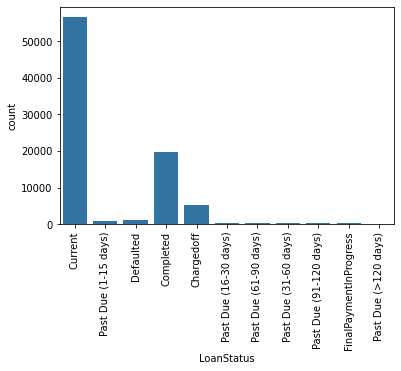

In [30]:
plt.xticks(rotation=90)
sns.countplot(data = target_df, x = 'LoanStatus', color = base_color);

### Observation 1:

Most of the loans in the data set are current loans, followed by completed loans and chargedoff loans
Past due loans are splited into various groups based on the length of payment delay in repayment.

## Variable 2: Employment Status

### Question 2
Is there any significant relationship between employment status and amount of Loan requested for?

### Visualization 2

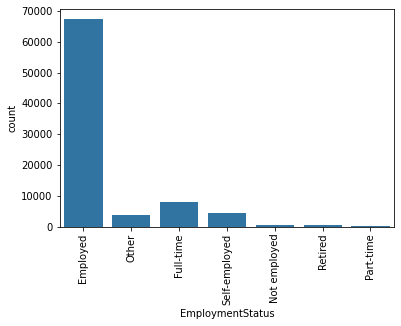

In [31]:
sns.countplot(data = target_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

### Observation 2:

The majority of borrowers are employed.
It is worthy of note that full-time and self employed workers 
request for more loans than the rest.

## Variable 3: Stated Monthly Income

### Question 3
How are the monthly income of borrowers distributed?

### Visualization 3A

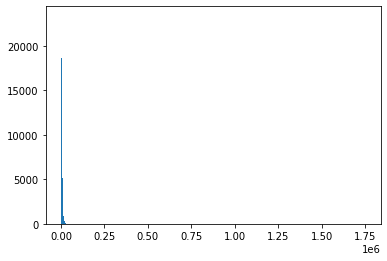

In [32]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);

Distribution of stated monthly income is highly skewed to the right. 
So, I have to check how many outliers in the dataset.

In [33]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

### Visualization 3B

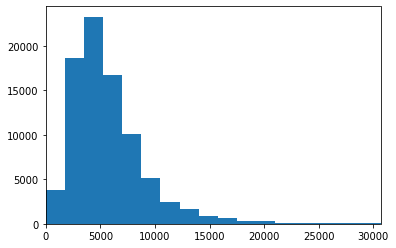

In [34]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

### Observation 3:

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

## Variable 4: ListingCategory (numeric)

### Question 4
What are the listing categories available in the data?

### Visualization 4

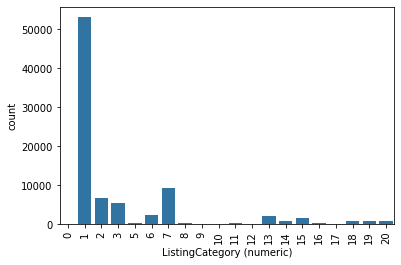

In [35]:
sns.countplot(data = target_df, x = 'ListingCategory (numeric)', color = base_color);
plt.xticks(rotation = 90);

### Observation 4
Listing Category Variable is set up as numeric and most of the values have very low frequency.
NB: I will change it to categorical later in the analysis in order to reduce the number of categories.

## Variable 5: LoanOriginalAmount

### Question 5
How are the loan original amount distributed?

### Visualization 5

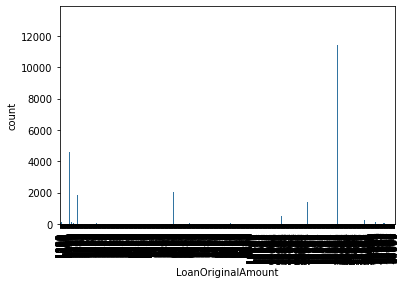

In [36]:
sns.countplot(data = target_df, x = 'LoanOriginalAmount', color = base_color);
plt.xticks(rotation = 90);    

### Observation 5
Distribution of Loan original amount is evenly distributed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of stated monthly income is very awkward. It has a lot of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are current loans.
The distribution of stated monthly income is highly skewed to the right. So, I checked the number of outliers.
However, the distribution of Loan original amount is evenly distributed.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.

## Bivariate Exploration

> In this section, I will be investigating the relationships between pairs of variables in my
data. The variables I cover here have been introduced in some fashion in the previous section (univariate exploration).

In [37]:
# Here, I'm just trying to restructure the Loan Status variable in the data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

### After transforming dataset, we have 19664 completed loans and 6341 defaulted.

In [38]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categories, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

Variable Listing Category is set up as numeric and most of the values have very low frequency as shown in one of the visuals under univariate analysis. 
For the easier visualization, I have change it to categorical and reduce the number of categories.

# Variable 1: Status and Prosper Rating

### Question 1
What is the most frequest Rating for the Loans given by Prosper?

### Visualization 1

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

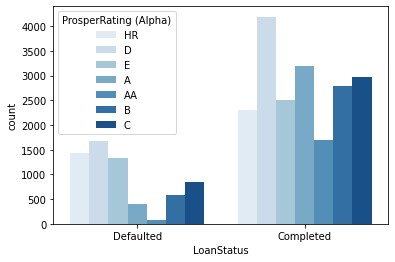

In [39]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')

### Observation 1:

The most frequent rating among defaulted and Completed loans is D.
While the second highest is A and so on.

# Variable 2

# Credit Start with Listing Category

### Question 2
Is there any significant diffence amongst the different Listing Categories of Loans?

### Visualization 2

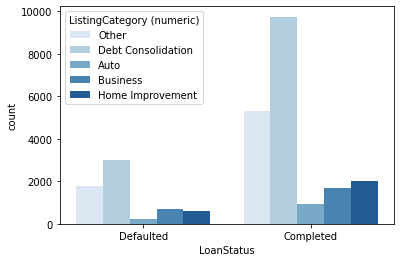

In [40]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues');

### Observation 2:

The debt consolidation category have the highest frequency among all of the categories, followed by other category.

# Variable 3

# Loan Status and Loan Amount

### Question 3
Is there any significant difference between completed and defaulted Loan?

### Visualization 3

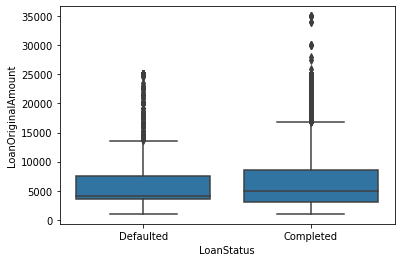

In [41]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

### Observation 3:

From the above graph, we can see completed credits are more than defaulted loans.

# Variable 4

# Prosper Rating and Employment Status

### Question 4
Is there any significant relationship between Prosper Rating and Employment Status?

### Visualization 4

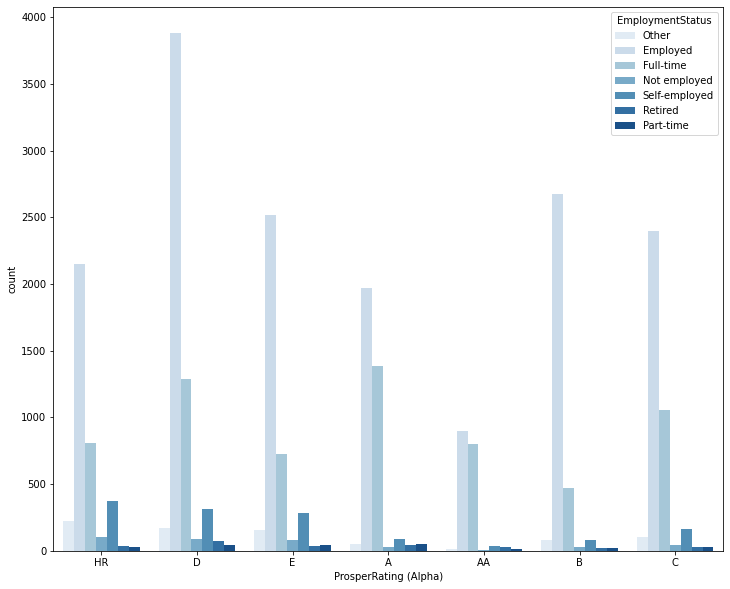

In [42]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues');

Observation 4:

Other employment status have greater ratings by prosper unlike the Not Employed, Self-employed, Retired and Part-Time employment statuses.

# Variable 5

# Employment Status and Loan Status

### Question 5
Is there any significant relationship between Employment Status and Loan Status?

### Visualization 5

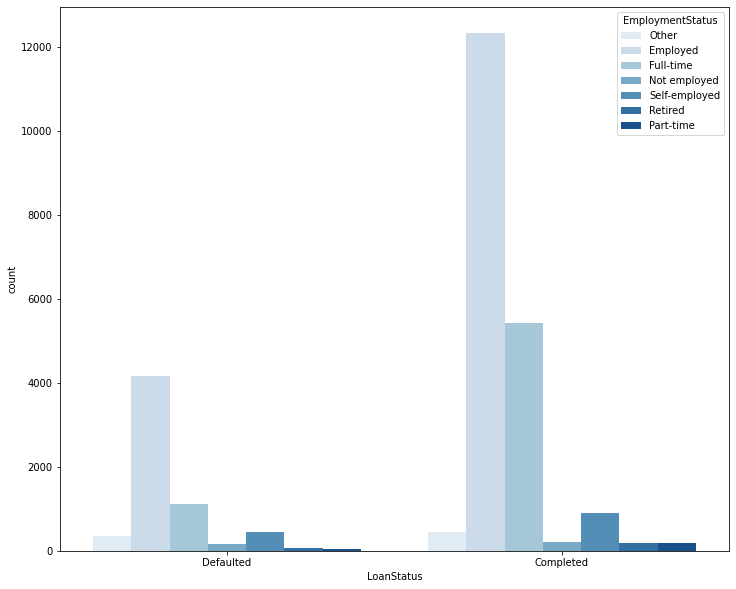

In [43]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues');

### Observation 5
As seen in the above visual, there is a significant difference between the completed Loan and defaulted Loan of employed and unemployed. The employed tend to complete their loans than the unemployed


# Multivariate Exploration

# Variable 1

# Rating, Loan Amount and Loan Status

### Question 1
Is there any significant relationship among rating, loan amount and status?

### Visualization 1

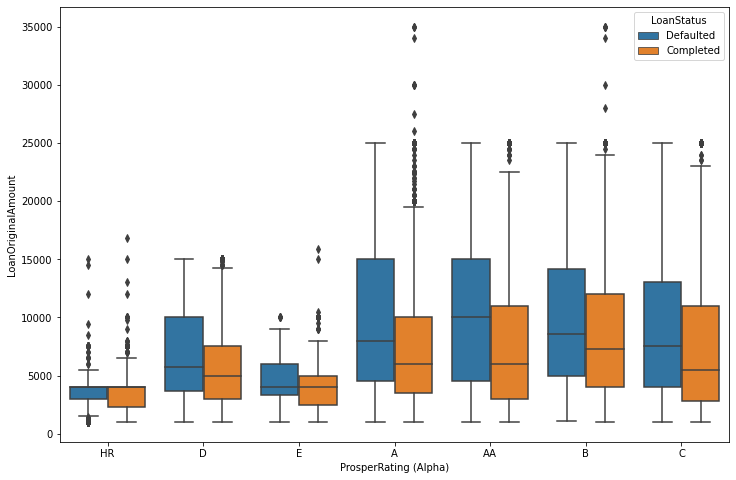

In [44]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

### Observation 1:

1. Except for the lowest ratings defaulted credits tend to be larger than completed.
2. Most of the defaulted credits comes from individuals with low Prosper rating.

# Variable 2

# Relationships between Credit category, Credit rating and outcome of Credit.

### Question 2
Is there any significant relationship among Credit categories, rating and outcome?

### Visualization 2

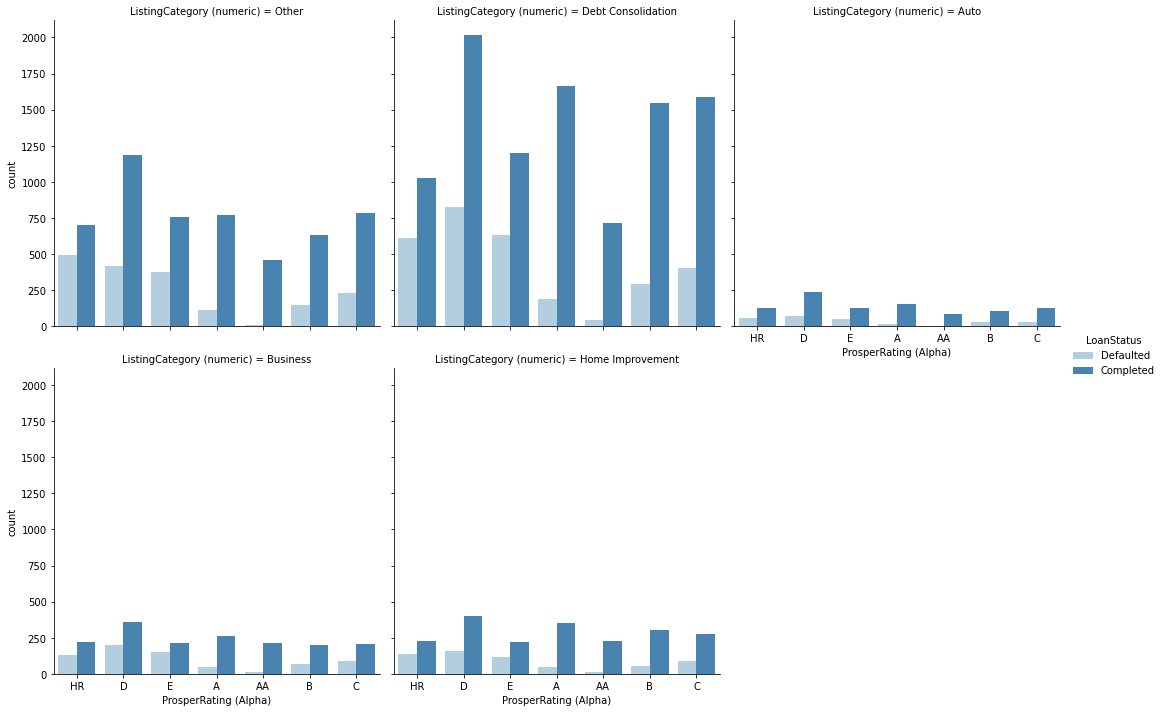

In [45]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

### Observation 2:

1. There are five graphs in the second one has much up and downs in it other than all of them.
2. There is no substantial difference for default rates in different categories broken up by ratings.

# Variable 3

# Amount, Listing Category Loan and Loan Status Interact

### Question 3
Is there any significant relationship among loan amount, Listing category and loan status?

### Visualization 3

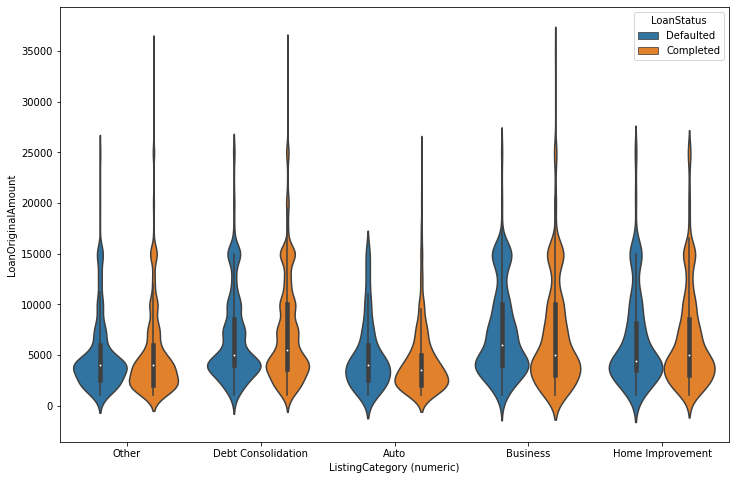

In [46]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

### Observation 3:

1. Except for Auto, Business and Home Improvemrnt do not have nearly equal mean among all of them.
2. Business category tend to have larger amount.

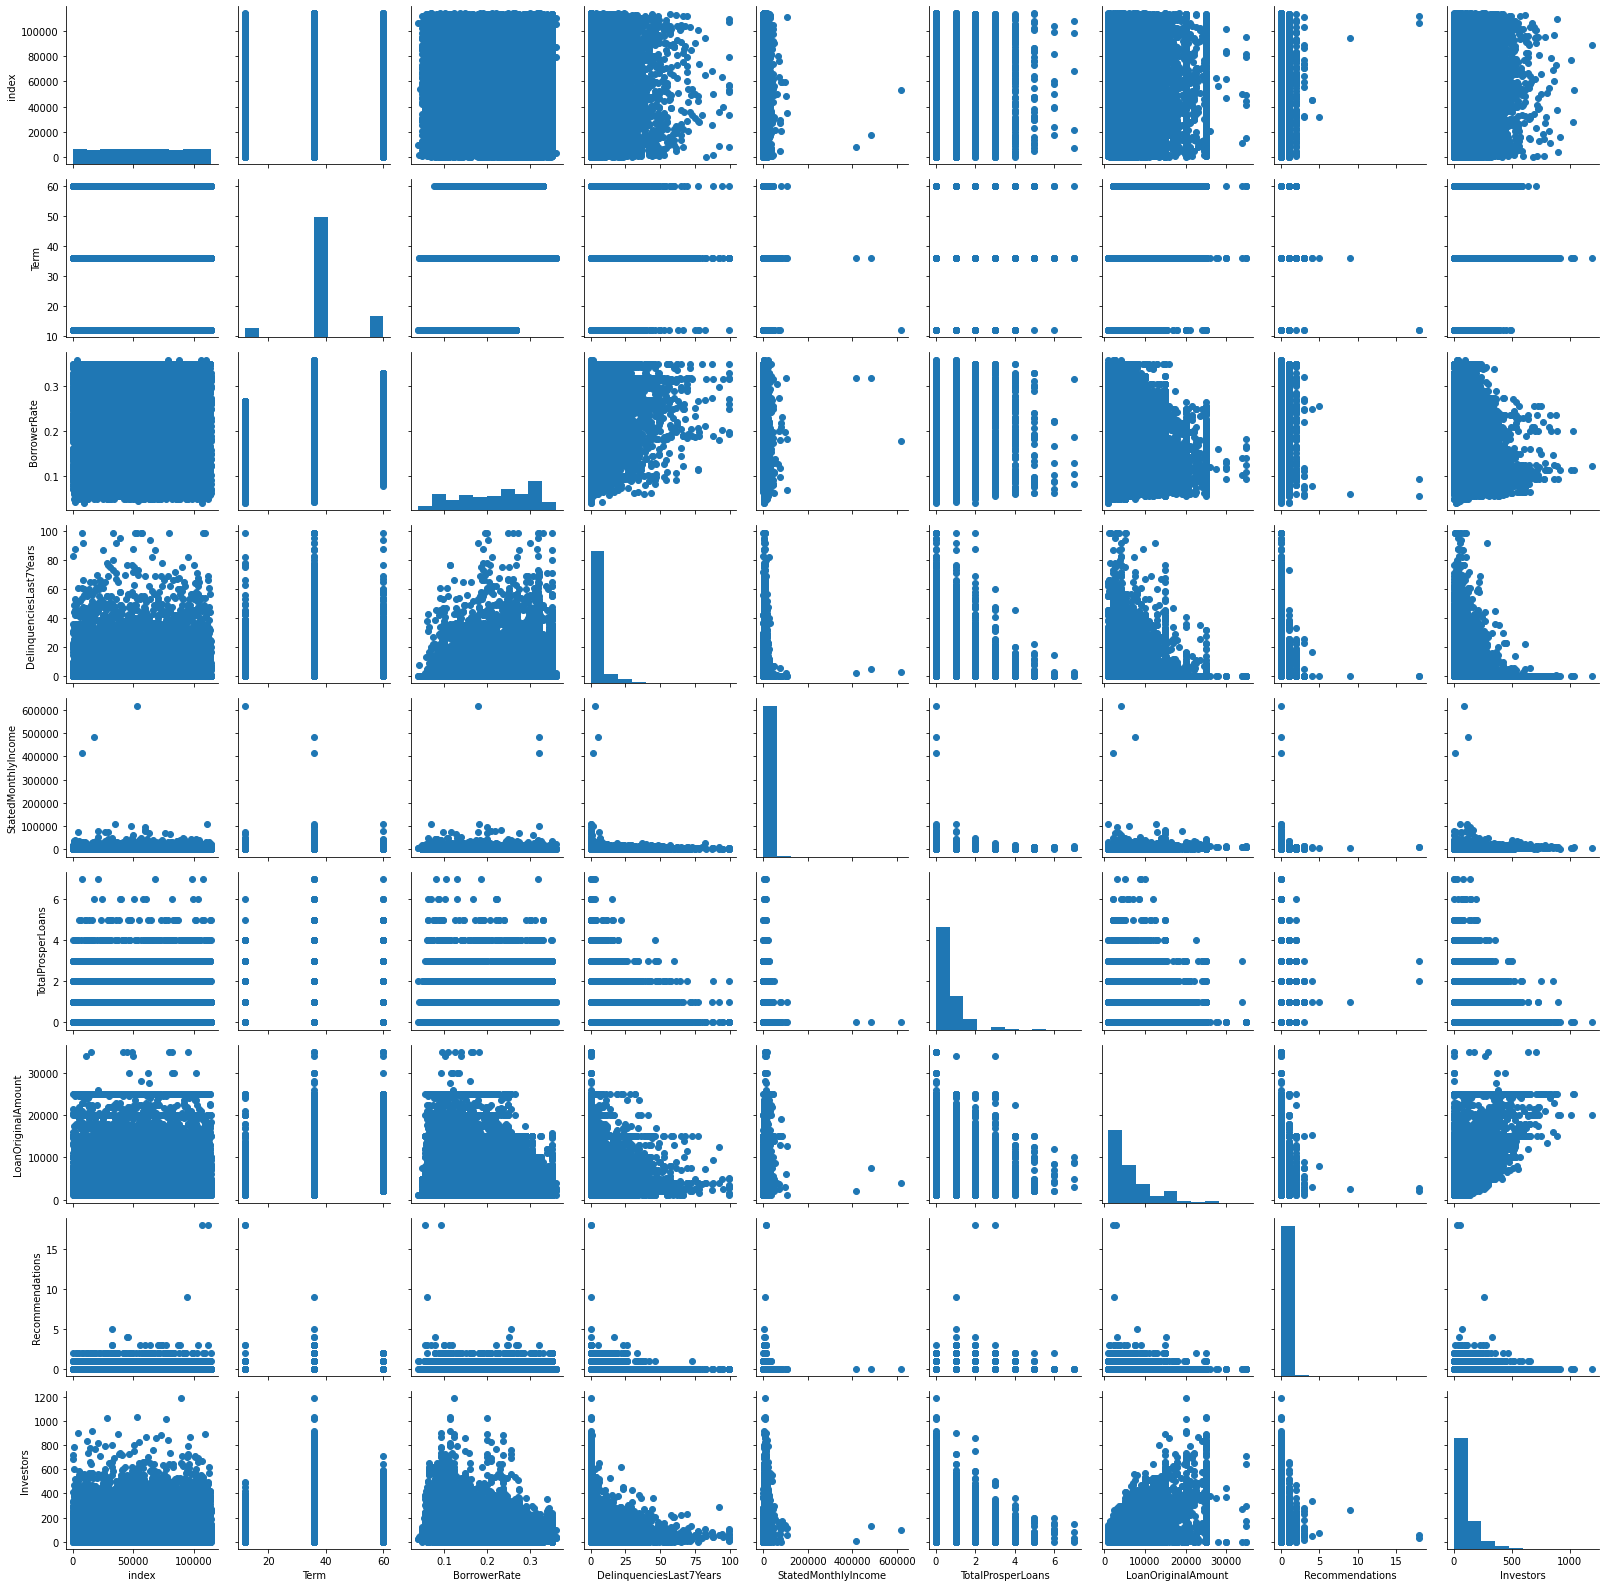

In [47]:
general_vis = sns.PairGrid(data = target_df)
general_vis.map_diag(plt.hist)
general_vis.map_offdiag(plt.scatter)

<AxesSubplot:>

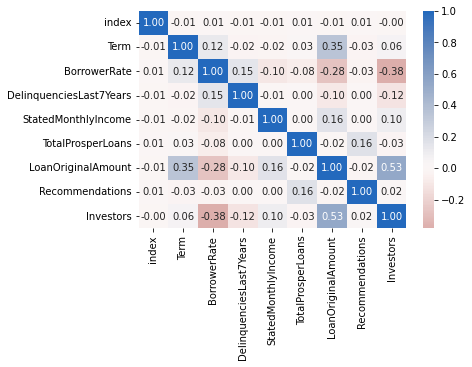

In [48]:
sns.heatmap(target_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

My initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

# Were there any interesting or surprising interactions between features?
Interesting finding was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits.

## Conclusions  
> ### Summary
My initial assumptions were strengthened. 

*** Most of the defaulted credits comes from individuals with low Prosper rating

*** The business category tend to have larger amount. This implies that majority of the loans were gotten for business purposes.

*** The employed tend to complete their loans than the unemployed


### What are the main driving factors of outcome of loan?
The main driving factors of outcome of loan from the analysis conducted in the project include the following:
1. Employment
2. Prosper Rating
3. Business Category

### Steps taken during my data exploration.
1. Question: The first step I took to conduct this project is to pose a general research question. From this one question, several other questions were asked and answered.
2. Analyse: Next, I used different libraries and functions to analyse the data in a bid to proffer answers to the questions posed.
3. Visualize: Then, I moved on to visualizing the data to aid comprehension and understanding of the findings from my analysis.
4. Observation: Lastly, I point out and explain my observations and findings to each of this question.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



## Limitations
1. No Data Dictionary
2. Time constraints